# Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# SMOTE For Relax Data Unbalance

In [2]:
ori_df = pd.read_csv('./dataset/gen/data.csv')

In [3]:
x_data = ori_df.iloc[:,:-1].to_numpy()
y_data = ori_df.iloc[:,-1].to_numpy()

In [4]:
smote = SMOTE(random_state=42)
new_x_data,new_y_data = smote.fit_resample(x_data,y_data)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_data.shape, y_data.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', new_x_data.shape, new_y_data.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(new_y_data).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (32048, 45) (32048,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (45290, 45) (45290,)
SMOTE 적용 후 레이블 값 분포: 
 0    22645
1    22645
Name: count, dtype: int64


In [15]:
x_df = pd.DataFrame(new_x_data, columns=ori_df.columns[:-1])
y_df = pd.DataFrame(new_y_data, columns=[ori_df.columns[-1]])
SMOTE_df = pd.concat([x_df,y_df], axis=1)
SMOTE_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,...,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,...,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,...,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,...,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,...,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,...,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,...,58.300000,5.000000,23.177721,9.261647e-01,320.186290,118.000000,1.773212e-01,17.000000,10.779435,1
45287,163.708695,4.316441,83.141247,163.708695,4.155709,4.640532,1.204446,3.701584e-02,325.286200,1.402896,...,57.870699,4.570699,23.644121,1.013653e+00,319.000000,115.000000,1.955588e-01,16.570699,28.586012,1
45288,173.000000,3.447687,-25.223552,173.000000,3.500000,3.500000,0.006652,2.790000e-19,328.000000,0.000000,...,30.150000,3.500000,-2.535778,0.000000e+00,331.000000,0.000000,-6.136825e-06,15.500000,50.000000,1


In [17]:
SMOTE_df.to_csv('./dataset/gen/SMOTE_df.csv',index=False)

# Preprocess For PCA

## Load Data

In [18]:
ori_df = pd.read_csv('./dataset/gen/SMOTE_df.csv')

In [21]:
pd.set_option('display.max_columns', 50)
ori_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
0,202.000000,4.000000,4.000000,202.000000,4.000000,4.000000,0.180000,2.070000e-02,329.000000,2.770000,-0.000001,162.000000,3.975000,-2.250000,162.000000,4.000000,4.000000,0.539000,1.670000e-02,328.000000,1.840000,6.430000e-07,123.000000,4.000000,4.000000,123.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.001000,4.250000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,329.000000,0.000000,6.960000e-07,16.000000,50.000000,0
1,202.000000,-6.800000,-346.000000,202.000000,-9.600000,-354.000000,-10.900000,1.860000e-01,328.000000,23.300000,0.004480,162.000000,-15.800000,-746.000000,161.000000,-20.600000,-643.000000,-14.500000,2.810000e-01,325.000000,37.800000,1.260000e-02,123.000000,-16.300000,-708.000000,122.000000,-21.600000,-670.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,4.250000,-357.000000,4.000000,4.000000,-0.288000,2.740000e-19,328.000000,0.000000,-5.270000e-07,16.000000,50.000000,0
2,200.000000,-13.800000,-2.250000,200.000000,-13.900000,3.999905,-8.590000,1.400000e-01,328.000000,30.600000,0.005330,158.000000,-28.500000,4.000000,158.000000,-28.300000,3.999905,-7.790000,1.390000e-01,327.000000,49.400000,9.430000e-03,119.000000,-29.700000,41.500000,119.000000,-29.700000,3.999905,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.562000,-357.000000,4.000000,4.000000,0.524000,2.740000e-19,328.000000,0.000000,9.100000e-07,16.000000,50.000000,0
3,198.000000,-14.000000,4.000000,198.000000,-13.900000,3.999905,-6.110000,1.300000e-01,327.000000,30.300000,0.004890,155.000000,-28.600000,-58.500000,155.000000,-28.300000,3.999905,-8.130000,1.560000e-01,325.000000,47.600000,1.050000e-02,116.000000,-29.700000,-2.250000,116.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,3.999000,3.750000,-357.000000,4.000000,4.000000,-0.180000,2.740000e-19,328.000000,0.000000,1.070000e-06,16.000000,50.000000,0
4,197.000000,-13.900000,-14.800000,196.000000,-13.900000,4.000095,-5.700000,1.140000e-01,328.000000,30.500000,0.004250,152.000000,-28.000000,142.000000,152.000000,-28.300000,4.000095,-13.800000,2.020000e-01,326.000000,47.100000,1.350000e-02,113.000000,-29.600000,22.800000,112.000000,-29.700000,4.000000,0.0,0.0,0.0,0.0,-357.000000,4.000000,3.812000,-357.000000,4.000000,4.000000,0.226000,2.740000e-19,328.000000,0.000000,1.960000e-06,16.000000,50.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,164.875376,5.184075,-24.003208,164.875376,5.219789,5.000000,2.050301,4.434864e-02,324.853474,5.462039,-0.000013,106.293052,1.391298,216.531350,106.293052,1.344413,5.000000,-5.416009,1.297734e-01,322.853474,17.741845,2.360077e-03,34.612085,4.975000,-1.707893,34.612085,5.000000,5.000000,0.0,0.0,0.0,0.0,-58.192587,58.221979,-59.170377,-57.851197,58.300000,5.000000,23.687915,9.722357e-01,320.706948,117.853474,1.870076e-01,17.000000,8.051361,1
45286,159.186290,-3.830530,-971.445575,159.186290,-5.779435,5.000000,-18.032339,2.918823e-01,324.203428,25.682862,0.006026,101.897175,5.064400,38.461344,101.897175,5.000000,5.000000,2.536376,6.012520e-02,323.203428,3.586788,-1.710079e-05,34.496572,5.000000,5.000000,34.496572,5.000000,5.000000,0.0,0.0,0.0,0.0,893.610283,58.320343,2.842464,89

## Generate Function & Designate Number of Components

In [169]:
def pca_recommender(x, y):
    col = x.columns
    x = StandardScaler().fit_transform(x)

    df = pd.DataFrame(x,columns=col)
    
    features =x.T
    cov_mat = np.cov(features)
    
    values, vectors = np.linalg.eig(cov_mat)
    
    explained_variances = []
    for i in range(len(values)):
        explained_variances.append(values[i] / np.sum(values))
    explained_variances = sorted(explained_variances, reverse=True) 
    
    plt.plot(explained_variances)
    plt.xlabel('Number of Component')
    plt.ylabel('Proportion of Variance')
    plt.title('Scree Plot')
    plt.xticks(np.arange(0,len(explained_variances),2))
    plt.show()
        
    df = pd.DataFrame({'Eigenvalues' : np.array(values),
                       'Proportion_of_Variance' : np.array(explained_variances)})
    df['Cumulative Proportion'] = df['Proportion_of_Variance'].cumsum()
    
    idx = df.index
    df = df.T
    df.columns = [f'PC{i+1}' for i in idx]
    df
    
    return df

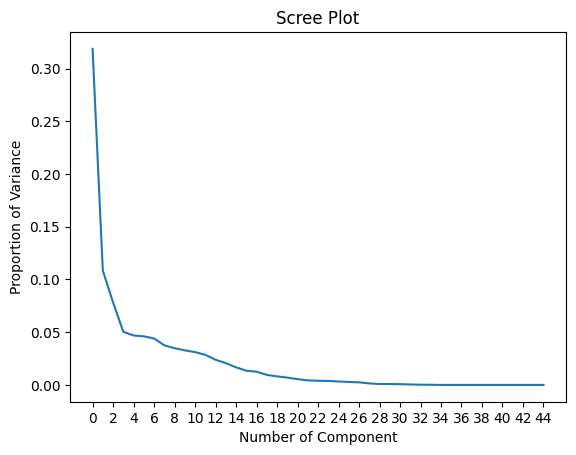

                              PC1       PC2       PC3       PC4       PC5   
Eigenvalues             13.065250  4.445617  3.206374  2.063596  1.923310  \
Proportion_of_Variance   0.318658  0.108427  0.078203  0.050331  0.046909   
Cumulative Proportion    0.318658  0.427085  0.505287  0.555618  0.602527   

                             PC6       PC7       PC8       PC9      PC10   
Eigenvalues             1.888568  1.807110  1.539549  1.428790  1.344684  \
Proportion_of_Variance  0.046062  0.044075  0.037549  0.034848  0.032796   
Cumulative Proportion   0.648589  0.692663  0.730213  0.765060  0.797857   

                            PC11      PC12      PC13      PC14      PC15   
Eigenvalues             1.275867  1.171021  0.978388  0.848304  0.683101  \
Proportion_of_Variance  0.031118  0.028561  0.023863  0.020690  0.016661   
Cumulative Proportion   0.828975  0.857536  0.881398  0.902088  0.918749   

                            PC16      PC17      PC18      PC19      PC20   
Eigen

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,error
0,-251.540825,7.488962,-17.029404,153.602738,2.056681,-2.080788,2.011135,27.755263,0.163129,-0.136817,0.301271,10.501222,2.554309,-5.204178,0
1,-252.403948,381.760271,-1166.196953,71.745474,-836.838031,-72.045651,-86.454222,10.854880,-4.142477,4.086599,60.647318,0.006587,4.081163,-2.181860,0
2,-251.464945,-0.743744,-13.914974,146.405120,28.733121,2.010480,3.856150,18.815586,0.077274,-23.469504,87.189708,-2.246803,-0.928184,-2.455270,0
3,-251.443555,35.617773,-44.891754,139.433360,1.078450,-41.045269,11.530413,14.238460,0.334809,5.983664,84.839217,-3.211256,-1.181972,-2.681762,0
4,-251.359196,-76.828192,46.756719,142.454718,7.162897,97.995128,-11.759271,9.889241,-1.221139,-8.727999,86.369172,-4.096014,-0.942339,-3.380281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45285,173.773183,-122.559555,91.579072,-47.926583,-16.287113,147.967133,-18.737207,26.333515,-66.097207,5.774190,6.657018,-6.857786,7.788386,-0.875639,1
45286,1519.672753,-595.399545,-556.246339,-77.977593,57.907663,150.644205,510.115617,9.174631,-7.076733,1.384300,4.546688,4.320432,6.799868,4.746263,1
45287,84.522087,81.281039,14.878090,-63.133355,0.071810,-57.784659,-30.005327,4.699181,1.971512,-1.703108,18.055085,6.056654,11.570751,-14.902057,1
45288,-59.006555,-16.577793,-23.836375,76.133443,-1.124344,8.610537,14.505279,-30.548261,-5.983626,3.609475,-8.147442,-11.009979,18.497488,-7.474628,1


In [176]:
y = ori_df['error']
x = ori_df.drop(['error'],axis=1)

df_for_explain = pca_recommender(x,y)
print(df_for_explain)

# rec_pca = PCA(n_components='mle', svd_solver = 'full')
# rec_printcipalComponents = rec_pca.fit_transform(x)
for col in range(len(df_for_explain.columns)):
    if df_for_explain.iloc[2,col] > 0.9:
        num_PC = col+1
        break

compo = int(input(f'몇 개의 성분을 선택하시겠습니까? (추천: {num_PC})\n'))

pca = PCA(n_components=compo)
printcipalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data=printcipalComponents,
                   columns = [f'PC{num+1}' for num in range(len(printcipalComponents[0]))])
pdf['error'] = y
pdf

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)

targets = pdf['error'].unique()
for target in targets:
    indicesToKeep = (pdf['error'] == target)
    ax.scatter(pdf.loc[indicesToKeep, 'pca1']
               , pdf.loc[indicesToKeep, 'pca2']
               , pdf.loc[indicesToKeep, 'pca3']
               , s = 50)
ax.legend(targets)
ax.grid()

# DNN

## Split Data

In [177]:
x_data = pdf.iloc[:,:len(pdf.columns)-1].to_numpy()
y_data = pdf.iloc[:,-1].to_numpy()

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
print(x_train.shape, x_val.shape, x_test.shape)

(27174, 14) (9058, 14) (9058, 14)


In [179]:
x_train = x_train.reshape(x_train.shape[0],-1,1)
x_val = x_val.reshape(x_val.shape[0],-1,1)
x_test = x_test.reshape(x_test.shape[0],-1,1)

## Set Environment

In [180]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17637077459774150092
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3643801600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6857776026621280119
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [181]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

## Set Model & Train

In [189]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Input, Activation, BatchNormalization

model = Sequential()
model.add(Dense(128, activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1920      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 16)               

In [190]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6, mode='min'),
             tf.keras.callbacks.ModelCheckpoint('./best1.h5', monitor='val_loss',save_best_only=True, mode='min')
            ]

model.fit(x_train, y_train, epochs=100, validation_data = (x_val, y_val),
          batch_size=32, verbose=1, callbacks=callbacks)

Epoch 1/100
850/850 [==============================] - 10s 10ms/step - loss: 1.2834 - acc: 0.5634 - val_loss: 0.6397 - val_acc: 0.6140
Epoch 2/100
850/850 [==============================] - 8s 9ms/step - loss: 0.6386 - acc: 0.6321 - val_loss: 0.5869 - val_acc: 0.7122
Epoch 3/100
850/850 [==============================] - 8s 9ms/step - loss: 0.5876 - acc: 0.7115 - val_loss: 0.5392 - val_acc: 0.7472
Epoch 4/100
850/850 [==============================] - 7s 8ms/step - loss: 0.5279 - acc: 0.7598 - val_loss: 0.4539 - val_acc: 0.8059
Epoch 5/100
850/850 [==============================] - 6s 7ms/step - loss: 0.4343 - acc: 0.8178 - val_loss: 0.4179 - val_acc: 0.8205
Epoch 6/100
850/850 [==============================] - 6s 7ms/step - loss: 0.3856 - acc: 0.8410 - val_loss: 0.3415 - val_acc: 0.8569
Epoch 7/100
850/850 [==============================] - 7s 8ms/step - loss: 0.3563 - acc: 0.8536 - val_loss: 0.3145 - val_acc: 0.8715
Epoch 8/100
850/850 [==============================] - 7s 9ms/step 

## Evaluate

In [48]:
y_pred = model.predict(x_test)

y_pred = y_pred.reshape(-1)

for y in range(len(y_pred)):
    if y_pred[y] >= 0.5:
        y_pred[y] = 1
    else:
        y_pred[y] = 0
        
y_pred = y_pred.reshape(-1,1)
y_pred

284/284 [==============================] - 1s 2ms/step
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0524322e-05]
 ...
 [9.9999416e-01]
 [9.7698474e-01]
 [9.3380684e-01]]


In [52]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("정밀도:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("재현율:", recall)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 점수:", f1)

정확도: 0.9527489512033561
정밀도: 0.9338723051409619
재현율: 0.9763762462071955
f1 점수: 0.9546514091968638
